# 🧑‍🤝‍🧑 Team Task: Exploratory Data Analysis (EDA)

Dear team,  

This notebook is our shared workspace. Each member should explore the dataset and contribute their insights. Please follow the steps below:

1. **Explore the dataset**  
   - Look at the columns, data types, and missing values.  
   - Summarize key statistics (mean, median, min, max, etc.).  
   - Visualize distributions (histograms, boxplots, etc.).  

2. **Analyze patterns**  
   - Identify correlations between features.  
   - Look for outliers or unusual trends.  
   - Suggest potential transformations or feature engineering ideas.  

3. **Document your findings**  
   - Write your analysis and observations in *Markdown cells*.  
   - Include plots and code where relevant.  
   - End with **suggestions** for what we, as a group, should focus on.  

---

✅ **Goal:**  
By the end, we will have multiple perspectives on the data. Then, as a group, we’ll decide on:  
- The main problems or questions to solve  
- The best features to use for modeling  
- Next steps in our project  

---


# Columns Details

**Basic Player Information**
Player– Player's name,
Nation – Player's nationality,
Pos – Position (FW, MF, DF, GK),
Squad – Club name,
Comp – League,
Age – Age of the player,
Born – Year of birth

**Playing Time & Appearances**
MP – Matches played,
Starts – Games started,
Min – Minutes played,
90s – Number of full 90-minute matches played

**Attacking Stats**
Gls – Goals scored,
Ast – Assists provided,
G+A – Goals + Assists,
xG – Expected goals,
xAG – Expected assists,
npxG – Non-penalty expected goals,
G-PK – Goals excluding penalties

**Defensive Stats**
Tkl – Total tackles,
TklW – Tackles won,
Blocks_stats_defense – Blocks made,
Int – Interceptions,
Tkl+Int – Combined tackles and interceptions,
Clr – Clearances,
Err – Errors leading to goals

**Passing & Creativity Stats**
PrgP – Progressive passes,
PrgC – Progressive carries,
KP – Key passes (passes leading to a shot),
Cmp%_stats_passing – Pass completion percentage,
Ast_stats_passing – Assists,
xA – Expected assists,
PPA – Passes into the penalty area

**Goalkeeping Stats**
GA – Goals conceded,
Saves – Saves made,
Save% – Save percentage,
CS – Clean sheets,
CS% – Clean sheet percentage,
PKA – Penalties faced,
PKsv – Penalty saves

**Possession & Ball Control**
Touches – Total touches of the ball,
Carries – Total ball carries,
PrgR – Progressive runs (carries moving the ball forward significantly),
Mis – Miscontrols,
Dis – Times dispossessed

**Miscellaneous Stats**
CrdY – Yellow cards,
CrdR – Red cards,
PKwon – Penalties won,
PKcon – Penalties conceded,
Recov – Ball recoveries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [30]:
df = pd.read_csv("/home/rahaf/code/rahafw/future_stars/data/players_data_light-2024_2025.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,8,3,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,51,12,2,0,0,2,10,0,0,0,0,50,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,2,2.09,2,0,0,0,0,0,0,0.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.02,0,6,10,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,47,66,71.2,705,190,0,0.0,0.0,0.0,1,2,0,0,6,54,12,1,0,0,5,11,0,0,0,0,47,4,4,2,2,0,5,80.0,1,1,0,1,0,4,3,0,1,0.75,1,0,0,0,0,0,0,0.0,85,1,21,28,36,0,85,4,1,25.0,2,50.0,46,215,103,0,3,0,3,1,49,10,2,0,0,0,2,0,5,0,4,0,0,0,7,2,1,66.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.10,3,2,3,1,0,0.0,1.38,0.0,0.0,NaN,24.5,0,0,0,0.1,0.1,0.07,-0.1,-0.1,17,29,58.6,268,110,0,0.0,0.0,0.0,0,0,0,0,2,21,8,0,0,0,1,8,0,0,0,0,17,3,2,2,1,0,3,100.0,0,1,0,1,1,4,0,0,0,0.00,0,0,0,0,0,0,0,0.0,36,1,8,19,9,1,36,1,1,100.0,0,0.0,13,101,67,3,2,1,0,2,16,3,1,0,0,2,0,1,1,1,2,0,0,0,2,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.06,3,4,1,1,0,0.0,1.02,0.0,0.0,NaN,15.0,0,0,0,0.1,0.1,0.06,-0.1,-0.1,36,46,78.3,614,206,0,0.0,0.0,0.0,0,2,0,0,4,45,1,1,0,0,0,0,0,0,0,0,36,4,2,4,0,0,3,66.7,1,2,1,1,1,5,3,0,1,1.02,1,0,0,0,0,0,0,0.0,65,8,37,22,7,2,65,0,0,NaN,0,NaN,29,219,165,3,1,1,1,3,34,1,1,0,0,4,3,0,0,1,2,0,0,0,7,2,2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,2,2,100.0,41,0,0,0.0,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,1,100.0,0,0,0,0,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.0,4,0,3,1,0,0,4,0,0,NaN,0,NaN,1,10,9,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(2854, 165)

# Exploring the data

In [32]:
selected_columns = [
    # Player info
    "Player", "Nation", "Pos", "Age",

    # Playing time
    "MP", "Starts", "Min", "90s",

    # Attacking
    "Gls", "Ast", "xG", "xAG", "G+A",

    # Defensive
    "Tkl", "TklW", "Blocks_stats_defense", "Clr", "Err",

    # Passing & Creativity Stats
    "PrgP", "PrgC", "KP", "xA",

    # Goalkeeping
    "GA", "Saves", "Save%", "CS", "CS%", "PKA", "PKsv",

    # Miscellaneous Stats
    "CrdY", "CrdR"
]

filtered_df = df[selected_columns].copy()

print(" filtered dataframe shape:", filtered_df.shape)

# Display all the columns
pd.set_option("display.max_columns", None)
filtered_df.head()

 filtered dataframe shape: (2854, 31)


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [33]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                2854 non-null   object 
 1   Nation                2847 non-null   object 
 2   Pos                   2854 non-null   object 
 3   Age                   2846 non-null   float64
 4   MP                    2854 non-null   int64  
 5   Starts                2854 non-null   int64  
 6   Min                   2854 non-null   int64  
 7   90s                   2854 non-null   float64
 8   Gls                   2854 non-null   int64  
 9   Ast                   2854 non-null   int64  
 10  xG                    2854 non-null   float64
 11  xAG                   2854 non-null   float64
 12  G+A                   2854 non-null   int64  
 13  Tkl                   2854 non-null   int64  
 14  TklW                  2854 non-null   int64  
 15  Blocks_stats_defense 

In [34]:
filtered_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,2854,2702,Rodri,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nation,2847,113,es ESP,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos,2854,10,DF,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2846.0,NaN,NaN,NaN,25.018974,4.491624,15.0,22.0,25.0,28.0,41.0
MP,2854.0,NaN,NaN,NaN,19.012964,11.502122,1.0,9.0,20.0,30.0,38.0
Starts,2854.0,NaN,NaN,NaN,13.497547,11.322991,0.0,3.0,11.0,23.0,38.0
Min,2854.0,NaN,NaN,NaN,1211.529082,965.191628,1.0,317.25,1052.5,1996.75,3420.0
90s,2854.0,NaN,NaN,NaN,13.460792,10.724564,0.0,3.5,11.7,22.2,38.0
Gls,2854.0,NaN,NaN,NaN,1.682901,3.152732,0.0,0.0,0.0,2.0,31.0
Ast,2854.0,NaN,NaN,NaN,1.200771,1.94617,0.0,0.0,0.0,2.0,18.0


In [35]:
# Check for missing data
missing_data = filtered_df.isna().mean().round(4).sort_values(ascending=False)
missing_data.head(30)

CS%                     0.9289
Save%                   0.9278
PKsv                    0.9257
Saves                   0.9257
GA                      0.9257
PKA                     0.9257
CS                      0.9257
Age                     0.0028
Nation                  0.0025
90s                     0.0000
Player                  0.0000
Pos                     0.0000
MP                      0.0000
Starts                  0.0000
Min                     0.0000
TklW                    0.0000
Tkl                     0.0000
G+A                     0.0000
xAG                     0.0000
xG                      0.0000
Ast                     0.0000
Gls                     0.0000
Blocks_stats_defense    0.0000
xA                      0.0000
KP                      0.0000
PrgC                    0.0000
PrgP                    0.0000
Clr                     0.0000
Err                     0.0000
CrdY                    0.0000
dtype: float64

In [36]:
print("Unique positions:", filtered_df["Pos"].unique())
print("Unique nations:", filtered_df["Nation"].nunique())
filtered_df["Nation"].value_counts().head(10)

Unique positions: ['DF' 'DF,MF' 'FW' 'MF,FW' 'MF' 'FW,MF' 'GK' 'FW,DF' 'DF,FW' 'MF,DF']
Unique nations: 113


Nation
es ESP     415
fr FRA     346
de GER     232
it ITA     227
eng ENG    224
br BRA      89
ar ARG      77
pt POR      64
nl NED      62
dk DEN      56
Name: count, dtype: int64

## Some Players with 2 postions 

### what are u suggesting?

In [37]:
# Since we need to build a streamlit map for scouts, we need full country names for clear filtering.

# Extract 3-letter code
filtered_df["Nation_code"] = filtered_df["Nation"].str.split().str[-1]

# Map to full country name
def full_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code

filtered_df["Nation_name"] = filtered_df["Nation_code"].apply(full_country_name)

# Testing
filtered_df[["Player", "Nation_code", "Nation_name"]].head(10)

,Player,Nation_code,Nation_name
0,Max Aarons,ENG,ENG
1,Max Aarons,ENG,ENG
2,Rodrigo Abajas,ESP,Spain
3,James Abankwah,IRL,Ireland
4,Keyliane Abdallah,FRA,France
5,Yunis Abdelhamid,MAR,Morocco
6,Himad Abdelli,ALG,ALG
7,Mohamed Abdelmoneim,EGY,Egypt
8,Ali Abdi,TUN,Tunisia
9,Saud Abdulhamid,KSA,KSA


### Not all countries appears on full name

the dataset uses **FIFA codes**, not standard **ISO codes**  
- Examples: KSA (Saudi Arabia) 
- pycountry only knows **ISO codes** like SAU  for Saudi Arabis 

That’s why some countries stayed as codes and didn’t convert to full names

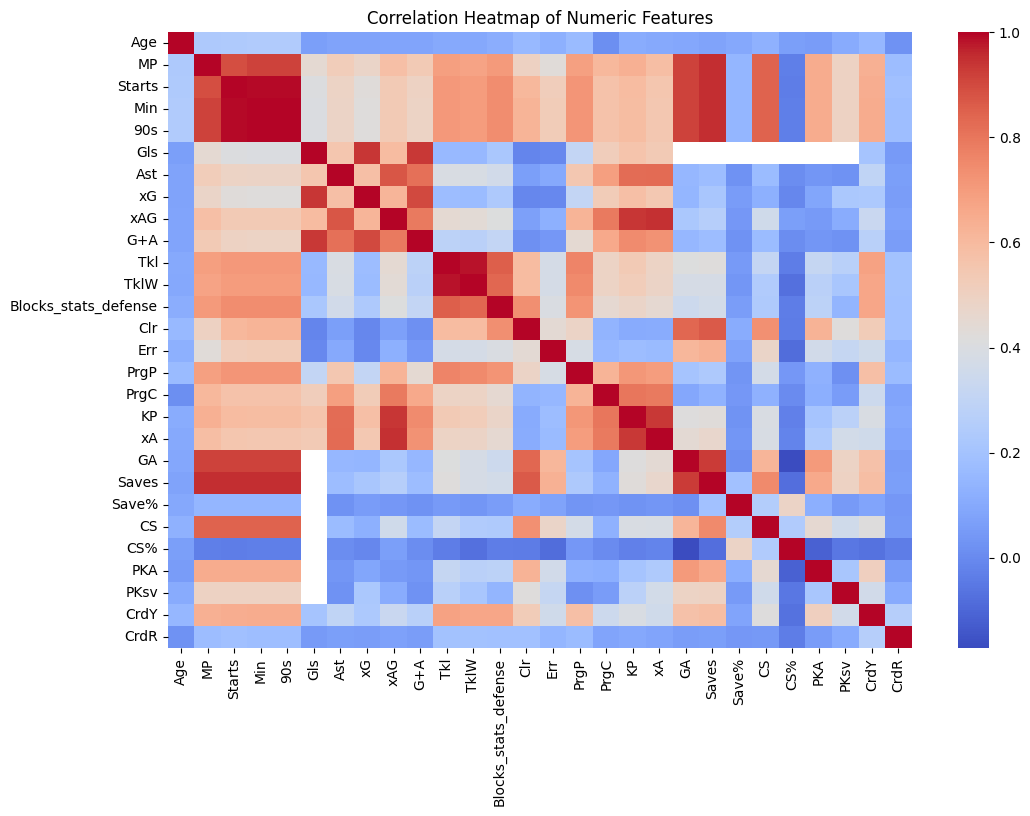

In [38]:
dc = filtered_df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sns.heatmap(dc.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Correlation Insights

From the correlation heatmap, I observed several **strong correlations**:

- **Playing time metrics**:  
  - MP, Starts, Min, and 90s are highly correlated.  
  - It make sence because more matches, more starts, more minutes, more full games.  

- **Attacking metrics**:  
  - Gls and xG show strong positive correlation (players with high expected goals usually score more).  
  - Ast correlates strongly with xAG and xA.  

- **Defensive metrics**:  
  - Tkl and TklW are highly correlated (players who attempt more tackles usually win more).    

- **Goalkeeping metrics**:  
  - GA (goals conceded) is negatively correlated with Save%, CS, CS%, and PKsv.  
  - This means that better goalkeepers are conceding fewer goals and has more clean sheets.  

- **Other features**:  
  - CrdY, CrdR don’t strongly correlate with most other features, so they are independent information.  

---

### Decision
This is the **EDA phase**, I will **not drop any columns yet**.  
For **modeling later**, we may drop or merge some of these highly correlated features to reduce redundancy.



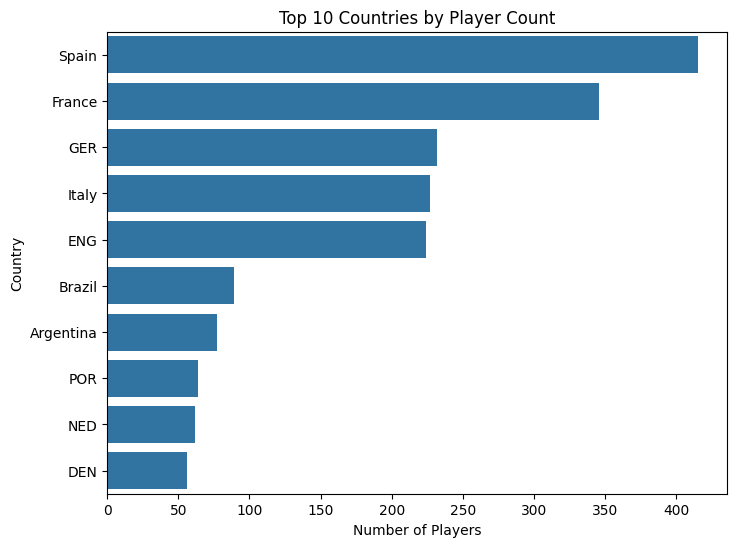

In [39]:
# This is important for our project, because scouts needs to know which country has the most players
top_nations = filtered_df["Nation_name"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_nations.values, y=top_nations.index)
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

# Explore Players Contribution

In [40]:
df_contrib = filtered_df.copy()

# Convert data into per 90 min so we have a fair coparison
df_contrib["Goals_per90"] = (df_contrib["Gls"] / df_contrib["Min"]) * 90
df_contrib["Assists_per90"] = (df_contrib["Ast"] / df_contrib["Min"]) * 90
df_contrib["GA_per90"] = (df_contrib["G+A"] / df_contrib["Min"]) * 90


# Top 10 in each feature
top_goals = df_contrib.sort_values("Goals_per90", ascending=False).head(10)
top_assists = df_contrib.sort_values("Assists_per90", ascending=False).head(10)
top_ga = df_contrib.sort_values("GA_per90", ascending=False).head(10)

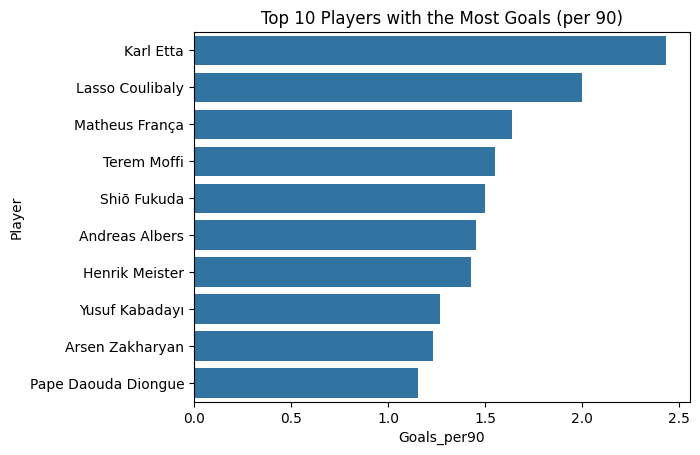

In [41]:
sns.barplot(x="Goals_per90", y="Player", data=top_goals)
plt.title("Top 10 Players with the Most Goals (per 90)")
plt.show()

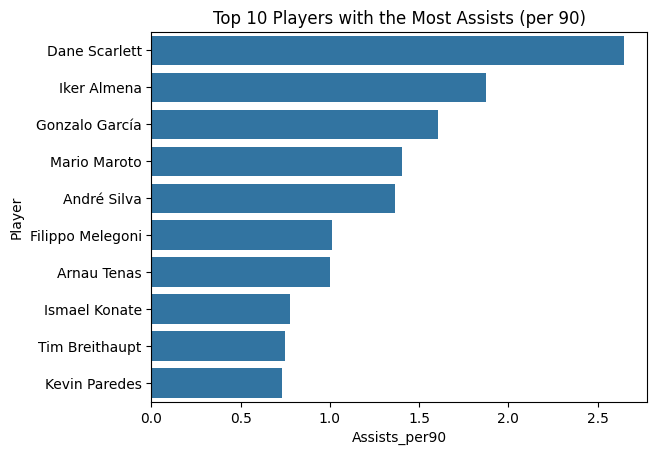

In [42]:
sns.barplot(x="Assists_per90", y="Player", data=top_assists)
plt.title("Top 10 Players with the Most Assists (per 90)")
plt.show()

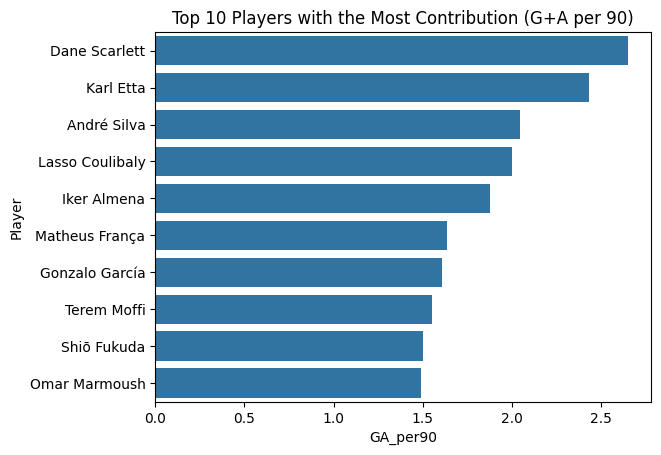

In [43]:
sns.barplot(x="GA_per90", y="Player", data=top_ga)
plt.title("Top 10 Players with the Most Contribution (G+A per 90)")
plt.show()

# Target Engineering


- Use per-90 min stats so minutes don’t bias the results

- Label top performers in each position group as “future star = 1”, others “= 0”

- Later, ML model will output score percentage

In [44]:
target_df = filtered_df.copy()

In [45]:
# Contributions per 90 minutes
target_df["GA_per90"] = (target_df["G+A"] / target_df["Min"]) * 90
target_df["xGA_per90"] = ((target_df["xG"] + target_df["xAG"]) / target_df["Min"]) * 90

# Defensive actions per 90
target_df["Def_Actions_per90"] = ((target_df["Tkl"] + target_df["Blocks_stats_defense"] + target_df["Clr"]) / target_df["Min"]) * 90

# Progressive passing per 90
target_df["ProgPass_per90"] = (target_df["PrgP"] / target_df["Min"]) * 90

## Temp Solution (might change)

In [46]:
# Mapping multiple position for one only

def map_role(pos):
    if "GK" in pos:
        return "GK"
    elif "FW" in pos:
        return "FW"
    elif "MF" in pos:
        return "MF"
    elif "DF" in pos:
        return "DF"
    else:
        return "Other"

target_df["Role"] = target_df["Pos"].apply(map_role)

In [47]:
# Future Star Score

def star_score(row):
    if row["Role"] == "FW":
        return row["GA_per90"]

    elif row["Role"] == "MF":
        return (0.6 * row["xGA_per90"]) + (0.4 * row["ProgPass_per90"])

    elif row["Role"] == "DF":
        return row["Def_Actions_per90"]

    elif row["Role"] == "GK":
        return row["Save%"]
    else:
        return 0

target_df["Star_Score"] = target_df.apply(star_score, axis=1)

In [48]:
# Find top 20% in each position

POS_TOP_PCT = 0.80
role_thresholds = target_df.groupby("Role")["Star_Score"].quantile(POS_TOP_PCT).rename("role_threshold")

target_df = target_df.merge(role_thresholds, left_on="Role", right_index=True, how="left")

target_df["Future_Star"] = (target_df["Star_Score"] >= target_df["role_threshold"]).astype(int)

In [49]:
# Testing

print(target_df.groupby("Role")["Future_Star"].mean())
print(target_df["Future_Star"].value_counts())

Role
DF    0.200233
FW    0.200399
GK    0.198113
MF    0.200000
Name: Future_Star, dtype: float64
Future_Star
0    2283
1     571
Name: count, dtype: int64


In [50]:
target_df.head(10)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR,Nation_code,Nation_name,GA_per90,xGA_per90,Def_Actions_per90,ProgPass_per90,Role,Star_Score,role_threshold,Future_Star
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,ENG,ENG,0.000000,0.000000,5.232558,8.372093,DF,5.232558,8.717289,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,ENG,ENG,0.000000,0.000000,6.000000,4.500000,MF,1.800000,2.476247,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,ESP,Spain,0.000000,0.138462,5.538462,2.769231,DF,5.538462,8.717289,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,IRL,Ireland,0.000000,0.102273,9.204545,4.090909,MF,1.697727,2.476247,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,FRA,France,0.000000,0.000000,30.000000,0.000000,FW,0.000000,0.576739,0
5,Yunis Abdelhamid,ma MAR,DF,36.0,16,11,1033,11.5,0,0,0.2,0.1,0,17,11,26,57,1,22,4,2,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,MAR,Morocco,0.000000,0.026137,8.712488,1.916747,DF,8.712488,8.717289,0
6,Himad Abdelli,dz ALG,"MF,FW",24.0,32,32,2842,31.6,6,1,6.4,3.2,7,48,32,24,28,2,207,107,39,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,ALG,ALG,0.221675,0.304011,3.166784,6.555243,FW,0.221675,0.576739,0
7,Mohamed Abdelmoneim,eg EGY,DF,25.0,12,10,855,9.5,0,0,0.0,0.0,0,21,14,11,56,1,52,6,0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,EGY,Egypt,0.000000,0.000000,9.263158,5.473684,DF,9.263158,8.717289,1
8,Ali Abdi,tn TUN,"DF,MF",30.0,25,17,1393,15.5,5,2,4.3,1.9,7,43,25,20,37,0,42,35,20,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,TUN,Tunisia,0.452261,0.400574,6.460876,2.713568,MF,1.325772,2.476247,0
9,Saud Abdulhamid,sa KSA,DF,25.0,4,2,205,2.3,0,1,0.0,0.2,1,3,2,2,0,0,9,6,2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,KSA,KSA,0.439024,0.087805,2.195122,3.951220,DF,2.195122,8.717289,0


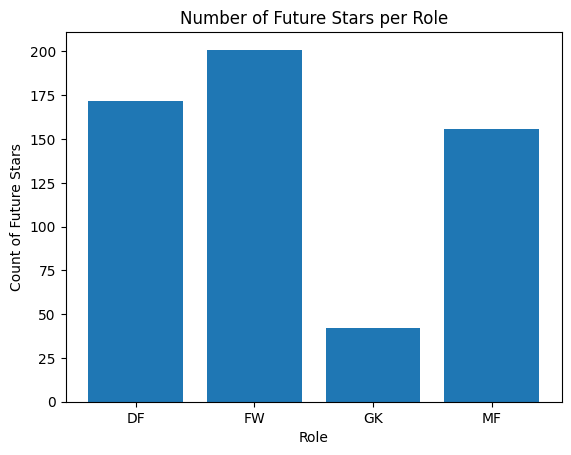

In [52]:
star_counts = target_df.groupby("Role")["Future_Star"].sum()

plt.bar(star_counts.index, star_counts.values)
plt.title("Number of Future Stars per Role")
plt.xlabel("Role")
plt.ylabel("Count of Future Stars")
plt.show()